Hello Future Engineers,

I'm Abdelrahman Abozied, Machine Learning Engineer.

Nice to meet you!

# 1- Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import warnings

nlp = spacy.load('en_core_web_sm')

%matplotlib inline
warnings.filterwarnings("ignore")

# 2- Data

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head(-5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,96,9
5563,ham,Ard 6 like dat lor.,19,1
5564,ham,Why don't you wait 'til at least wednesday to ...,67,3
5565,ham,Huh y lei...,12,3


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [5]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [6]:
df.groupby('label').describe()

length                                                           \
        count        mean        std   min    25%    50%    75%    max   
label                                                                    
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0   
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0   

        punct                                                 
        count      mean       std  min  25%  50%  75%    max  
label                                                         
ham    4825.0  3.939896  4.734768  0.0  1.0  3.0  5.0  133.0  
spam    747.0  5.712182  3.460834  0.0  3.0  5.0  8.0   26.0

In [7]:
X = df['message']
y = df['label']

print("X Shape:", X.shape)
print("y Shape:", y.shape)

X Shape: (5572,)
y Shape: (5572,)


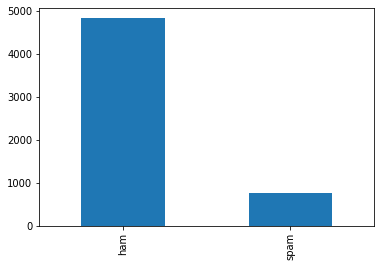

In [8]:
df["label"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 0, 'Message Length')

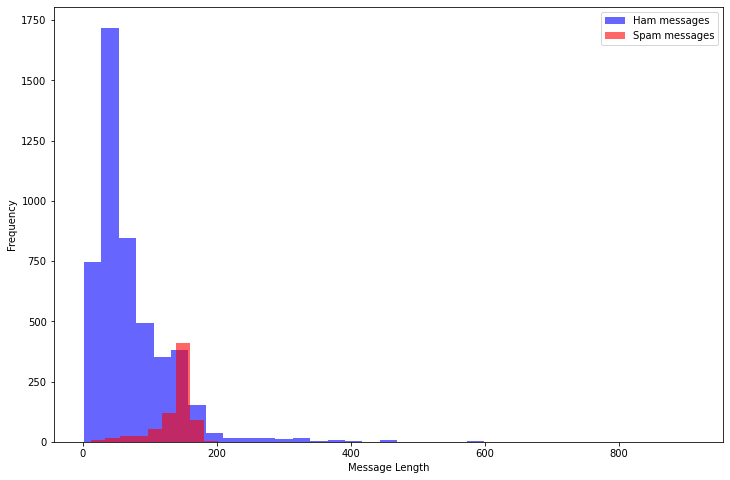

In [9]:
plt.figure(figsize=(12, 8))

df[df.label=='ham'].length.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
df[df.label=='spam'].length.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

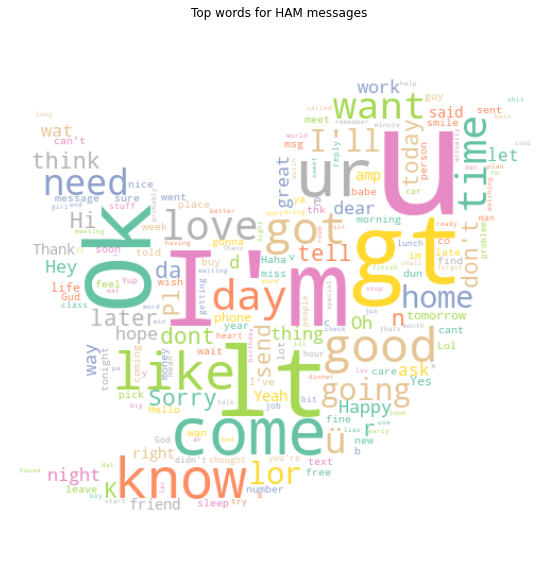

In [10]:
twitter_mask = np.array(Image.open('./twitter.jpg'))

wc_ham = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', 
               collocations=False, stopwords = STOP_WORDS, mask=twitter_mask).generate(' '.join(text for text in df.loc[df['label'] == 'ham', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for HAM messages')
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis("off")
plt.show()

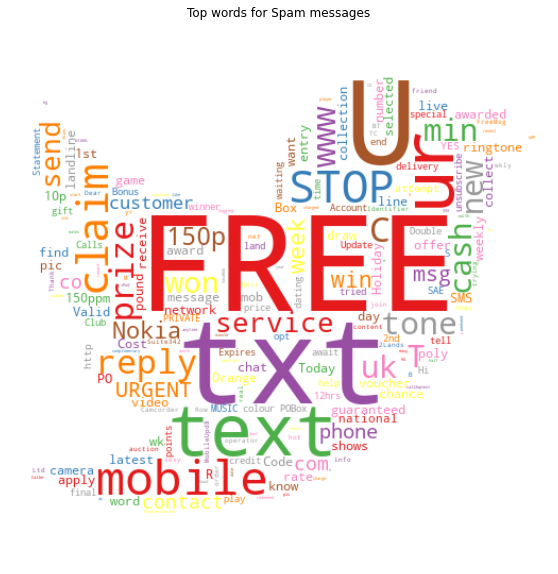

In [11]:
wc_spam = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set1', 
               collocations=False, stopwords = STOP_WORDS, mask=twitter_mask).generate(' '.join(text for text in df.loc[df['label'] == 'spam', 'message']))
plt.figure(figsize=(18,10))
plt.title('Top words for Spam messages')
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
def TextCleaning(X):
    documents = []
    
    for sent in X:
        # Remove all single characters
        sent = re.sub(r'\s+[a-zA-Z]\s+', ' ', sent)
        
        # Substituting multiple spaces with single space
        sent = re.sub(r'\s+', ' ', sent, flags=re.I)
        
        doc = nlp(sent)
        
        document = [token.lemma_ for token in doc]
        
        document = ' '.join(document)
        
        documents.append(document)
    return documents

In [13]:
X[:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [14]:
X = TextCleaning(X)
X[:5]

['go until jurong point , crazy .. available only in bugis great world la buffet ... Cine there get amore wat ...',
 'ok lar ... joke wif oni ...',
 "free entry in 2 wkly comp to win FA Cup final tkts 21st May 2005 . Text fa to 87121 to receive entry question(std txt rate)T&C 's apply 08452810075over18 's",
 'U dun say so early hor ... c already then say ...',
 "Nah do n't think he go to usf , he live around here though"]

In [15]:
Vectorizer = TfidfVectorizer(stop_words=STOP_WORDS)

In [16]:
X = Vectorizer.fit_transform(X, y)
X.shape

(5572, 7523)

In [17]:
X = X.toarray()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4179, 7523)
y_train shape: (4179,)
X_test shape: (1393, 7523)
y_test shape: (1393,)


# 3- Model

In [19]:
NB = MultinomialNB()
NB.fit(X_train, y_train)

MultinomialNB()

In [20]:
print(NB.score(X_train, y_train))
print(NB.score(X_test, y_test))

0.9803780808805934
0.9741564967695621


In [21]:
y_pred = NB.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

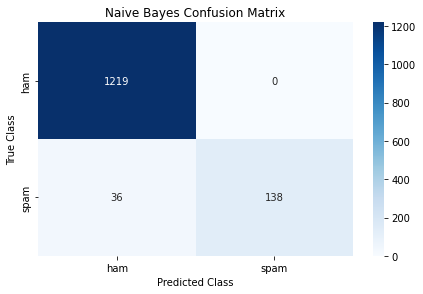

In [22]:
# Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
CM = pd.DataFrame(CM, index=df['label'].unique(), columns=df['label'].unique())

sns.heatmap(CM, annot=True, cmap="Blues", fmt = 'g')
plt.title("Naive Bayes Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1219
        spam       1.00      0.79      0.88       174

    accuracy                           0.97      1393
   macro avg       0.99      0.90      0.94      1393
weighted avg       0.97      0.97      0.97      1393



In [24]:
NB.predict(Vectorizer.transform(['Hi Abdelrahman Abozied, I have a job offer for you as a Machine Learning Engineer']))

array(['ham'], dtype='<U4')

In [25]:
NB.predict(Vectorizer.transform(['Congratulations, you won @ free rolex']))

array(['spam'], dtype='<U4')

In [26]:
class TextCleaning():
    def __init__(self):
        print("call init")
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        documents = []
        for sent in X:
            # Remove all single characters
            sent = re.sub(r'\s+[a-zA-Z]\s+', ' ', sent)

            # Substituting multiple spaces with single space
            sent = re.sub(r'\s+', ' ', sent, flags=re.I)

            doc = nlp(sent)

            document = [token.lemma_ for token in doc]

            document = ' '.join(document)

            documents.append(document)
        return documents

In [27]:
EmailClassification = Pipeline([('TextCleaning', TextCleaning()),
                                ('Vectorizer', TfidfVectorizer(stop_words=STOP_WORDS)),
                                ('NB', MultinomialNB())])

call init


In [28]:
EmailClassification.fit(df['message'], y)
print("Model score:", EmailClassification.score(df['message'], y))

Model score: 0.9843862167982771


In [29]:
EmailClassification.predict(['Hi Abdelrahman Abozied, I have a job offer for you as a Machine Learning Engineer'])

array(['ham'], dtype='<U4')

In [30]:
EmailClassification.predict("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")[0]

'ham'

In [31]:
from joblib import dump, load
dump(EmailClassification, 'EmailClasification.joblib')

['EmailClasification.joblib']

In [32]:
model = load('EmailClasification.joblib')

In [33]:
model.predict(['Hi Abdelrahman Abozied, I have a job offer for you as a Machine Learning Engineer'])

array(['ham'], dtype='<U4')

In [34]:
model.predict(['congratulations , you won @ rolex'])

array(['spam'], dtype='<U4')

In [35]:
len('congratulations , you won @ rolex')

33

In [36]:
len(model.predict('congratulations , you won @ rolex'))

33

In [37]:
model.predict(['congratulations , you won @ rolex'])

array(['spam'], dtype='<U4')